In [1]:
#Importing the dataset
import pandas as pd
df = pd.read_csv('Online-retail.csv', header = None)
df.shape

(7501, 20)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


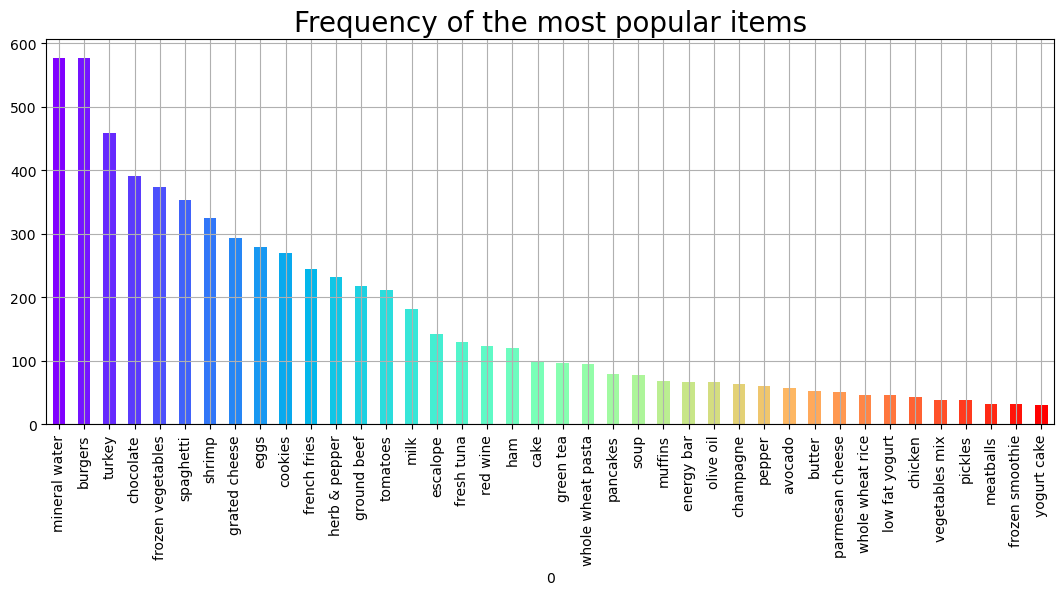

In [3]:
#Frequency of most popular i
import matplotlib.pyplot as plt
import numpy as np

color = plt.cm.rainbow(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('Frequency of the most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [4]:
data_cleaned = df.drop_duplicates()

In [5]:
data_cleaned


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,burgers,salmon,pancakes,french fries,frozen smoothie,fresh bread,mint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7494,turkey,burgers,dessert wine,shrimp,pasta,tomatoes,pepper,milk,pancakes,whole wheat rice,oil,frozen smoothie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
trans = []
for i in range(0, 5176):
  trans.append([str(df.values[i, j]) for j in range(0, 20)])

In [7]:
len(trans)

5176

In [8]:
trans[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [9]:
trans[1]

['burgers',
 'meatballs',
 'eggs',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

In [10]:
from apyori import apriori
rules = apriori(transactions = trans,
                min_support = 0.003,
                min_confidence = 0.2,
                min_lift = 3,
                min_length = 2, max_length = 2)

In [11]:
rules

<generator object apriori at 0x0000020F80898300>

In [12]:
results = list(rules)
results


[RelationRecord(items=frozenset({'almonds', 'burgers'}), support=0.005795981452859351, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.28571428571428575, lift=3.250235478806908)]),
 RelationRecord(items=frozenset({'ground beef', 'blueberries'}), support=0.0030911901081916537, ordered_statistics=[OrderedStatistic(items_base=frozenset({'blueberries'}), items_add=frozenset({'ground beef'}), confidence=0.3137254901960784, lift=3.029558091893474)]),
 RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004443585780525503, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2804878048780488, lift=4.508710801393729)]),
 RelationRecord(items=frozenset({'light cream', 'cooking oil'}), support=0.0034775888717156105, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'cooking oil'}), confidence=

In [13]:
len(results)

14

In [14]:
results[0]

RelationRecord(items=frozenset({'almonds', 'burgers'}), support=0.005795981452859351, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.28571428571428575, lift=3.250235478806908)])

In [15]:
results[0][1] # support
results[0][2][0][0] # base item
results[0][2][0][1] # add item
results[0][2][0][2] # confidence
results[0][2][0][3] # lift


3.250235478806908

In [16]:
#let us consider the array format.
a = []
b = []
c = []
d = []
e = []

In [17]:
for i in range(0,14):
    c.append(results[i][1]) # support
    a.append(results[i][2][0][0]) # base item
    b.append(results[i][2][0][1]) # add item
    d.append(results[i][2][0][2]) # confidence
    e.append(results[i][2][0][3]) # lift

In [18]:
##converting into data frame
d1 = pd.DataFrame(a)
d2 = pd.DataFrame(b)
d3 = pd.DataFrame(c)
d4 = pd.DataFrame(d)
d5 = pd.DataFrame(e)

In [19]:
newdata = pd.concat([d1,d2,d3,d4,d5],axis=1)
newdata.columns = ['baseitem','additem','support','cofidence','lift']
newdata


,baseitem,additem,support,cofidence,lift
0,almonds,burgers,0.005796,0.285714,3.250235
1,blueberries,ground beef,0.003091,0.313725,3.029558
2,light cream,chicken,0.004444,0.280488,4.508711
3,light cream,cooking oil,0.003478,0.219512,3.812735
4,mushroom cream sauce,escalope,0.005603,0.295918,3.638179
5,pasta,escalope,0.004830,0.316456,3.890676
6,extra dark chocolate,olive oil,0.003091,0.253968,3.641384
7,fromage blanc,honey,0.003284,0.253731,5.031852
8,parmesan cheese,frozen vegetables,0.005796,0.361446,3.734218
9,herb & pepper,ground beef,0.015456,0.329218,3.179166


In [20]:
print(max(a))

frozenset({'almonds'})


In [21]:
print(max(b))

frozenset({'burgers'})


In [22]:
print(max(c))

0.015455950540958269


In [23]:
print(max(d))

0.3614457831325301


In [24]:
#for light cream item we can observe it is having more confidence values with olive oil.

##here we can observe for pasta as base item shrimp and escalope are having more confidence levels.

##for parmesan cheese , frozen vegetables is having the confidence value of 0.36

##fro tomato sause , the item ground beef item is showing the confidence of value 0.32

##for blueberries the confidence value is 0.313 with respect to the item ground beef

In [25]:
print(max(e))

5.031852233087436


In [26]:
## we can observe the lift value of 5 which is the highest from the rules 
##with the items as fromage as base item and additional item as honey

In [27]:
print(min(e))

3.029558091893474


In [28]:
#here we can observe that blue berries item is increasing the lift of 3 times the item ground beef.

In [29]:
##2nd kind of implementation

In [128]:
##SETTING THRESHOLD VALUES

#SUPPORT = 0.01
#CONFIDENCE=0.2
#LIFT=0.3

In [129]:
#Getting the list of transactions from the dataset
transactions2 = []
for i in range(0, len(data_cleaned)):
    transactions2.append([str(df.values[i,j]) for j in range(0, len(data_cleaned.columns))])

In [130]:
from apyori import apriori
rules1 = apriori(transactions = transactions2,
                min_support = 0.005,
                min_confidence = 0.2,
                min_lift = 3,
                min_length = 2, max_length = 2)

In [131]:
print(rules1)

<generator object apriori at 0x0000020F8089BE20>


In [132]:
results1 = list(rules1)
results1

[RelationRecord(items=frozenset({'almonds', 'burgers'}), support=0.005795981452859351, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.28571428571428575, lift=3.250235478806908)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.0056027820710973725, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.29591836734693877, lift=3.638179262203694)]),
 RelationRecord(items=frozenset({'parmesan cheese', 'frozen vegetables'}), support=0.005795981452859351, ordered_statistics=[OrderedStatistic(items_base=frozenset({'parmesan cheese'}), items_add=frozenset({'frozen vegetables'}), confidence=0.3614457831325301, lift=3.7342183103672175)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015455950540958269, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), item

In [133]:

len(results1)

5

In [134]:
results1[0]

RelationRecord(items=frozenset({'almonds', 'burgers'}), support=0.005795981452859351, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.28571428571428575, lift=3.250235478806908)])

In [135]:
results1[1]

RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.0056027820710973725, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.29591836734693877, lift=3.638179262203694)])

In [136]:
results1[2]

RelationRecord(items=frozenset({'parmesan cheese', 'frozen vegetables'}), support=0.005795981452859351, ordered_statistics=[OrderedStatistic(items_base=frozenset({'parmesan cheese'}), items_add=frozenset({'frozen vegetables'}), confidence=0.3614457831325301, lift=3.7342183103672175)])

In [137]:
results1[3]

RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015455950540958269, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3292181069958848, lift=3.179165898900559)])

In [119]:
for i in range(0,5):
    print(results1[i])

RelationRecord(items=frozenset({'almonds', 'burgers'}), support=0.005795981452859351, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.28571428571428575, lift=3.250235478806908)])
RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.0056027820710973725, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.29591836734693877, lift=3.638179262203694)])
RelationRecord(items=frozenset({'parmesan cheese', 'frozen vegetables'}), support=0.005795981452859351, ordered_statistics=[OrderedStatistic(items_base=frozenset({'parmesan cheese'}), items_add=frozenset({'frozen vegetables'}), confidence=0.3614457831325301, lift=3.7342183103672175)])
RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015455950540958269, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=f

In [138]:
results1[0][1]        #support
results1[0][2][0][0]  #base item
results1[0][2][0][1]  #add item
results1[0][2][0][2]  #confidence
results1[0][2][0][3]  #lift

3.250235478806908

In [139]:
#let us consider the array format.
a1 = []
b1 = []
c1 = []
d1 = []
e1 = []

In [140]:
for i in range(0,5):
    c1.append(results1[i][1])       # support
    a1.append(results1[i][2][0][0]) # base item
    b1.append(results1[i][2][0][1]) # add item
    d1.append(results1[i][2][0][2]) # confidence
    e1.append(results1[i][2][0][3]) # lift

In [141]:
##converting into data frame
d11 = pd.DataFrame(a1)
d21 = pd.DataFrame(b1)
d31 = pd.DataFrame(c1)
d41 = pd.DataFrame(d1)
d51 = pd.DataFrame(e1)

In [142]:
newdata1 = pd.concat([d11,d21,d31,d41,d51],axis=1)
newdata1.columns = ['baseitem','additem','support','cofidence','lift']
newdata1


,baseitem,additem,support,cofidence,lift
0,almonds,burgers,0.005796,0.285714,3.250235
1,mushroom cream sauce,escalope,0.005603,0.295918,3.638179
2,parmesan cheese,frozen vegetables,0.005796,0.361446,3.734218
3,herb & pepper,ground beef,0.015456,0.329218,3.179166
4,whole wheat pasta,olive oil,0.007148,0.278195,3.988753


In [ ]:
##hence we changed the threshold values and also obtained new rules.
##therefore we can say based on different threshold values the rules will also be changed.
 

In [ ]:
#Interview Questions:
#What is lift and why is it important in Association rules?


In [ ]:
#Lift is a measure of how much more likely two items are to be bought together than if they were bought independently.
#It is important because it helps identify strong associations that are not just due to chance.

In [ ]:
#What is support and Confidence. How do you calculate them?

In [ ]:
#Support is the proportion of transactions that contain a particular itemset. It is calculated as 

#support(𝐴)=Number of transactions containing 𝐴/Total number of transactions

#Confidence is a measure of the reliability of the inference made by a rule. It is calculated as 

#confidence(𝐴→𝐵)=support(𝐴∪𝐵)/support(𝐴)

​
 .

In [ ]:
#What are some limitations or challenges of Association rules mining?

In [ ]:
#It can produce a large number of rules, many of which may not be interesting or useful.

#It can be computationally expensive, especially with large datasets.

#The choice of support and confidence thresholds can greatly affect the results and may require domain knowledge to set appropriately.
